<a href="https://colab.research.google.com/github/Renatolopo/sistemas-de-apoio-a-decisao/blob/main/SAD_Clusteriza%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clusterização
**Aluno: Renato Lopo**
- Adapte o seu banco de dados, ou escolha outro nos sites já indicados para o problema de clusterização
- Poste nos comentários desta atividade o banco escolhido. Não escolha um que outro colega já esteja utilizando.

- Aplique os códigos apresentados no notebook ao banco escolhido testando a técnica do kmeans e dbscan
- Apresente, ao final do notebook, qual algoritmo performou mais e uma descrição dos grupos encontrados


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datasets/wine-clustering.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Pré-processamento dos dados

In [ ]:
df.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [ ]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

Os dados parecem tudo ok

## K-means

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
k_fit = KMeans(n_clusters=4).fit(df)

In [ ]:
kumeler = k_fit.labels_

### Vizualização

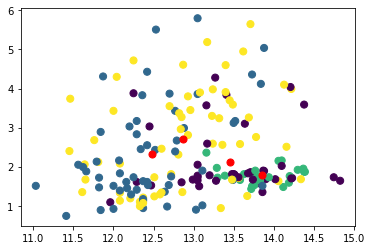

In [ ]:
centroids = k_fit.cluster_centers_
plt.scatter(df.iloc[:,0],  df.iloc[:,1], c = kumeler, s = 50, cmap = "viridis")
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()


### Avaliação do k-means

In [ ]:
#a partir do coeficiente de silhueta
from sklearn.metrics import silhouette_score
kmeans_silhouette = silhouette_score(df,k_fit.labels_ ).round(2)
kmeans_silhouette
#kmeans_labels_ são as classes preditas para cada exemplo
#round é para arredondar o resultado

0.56

In [ ]:
k_fit.inertia_

1333139.2086165317

### Escolhendo o número de clusters

In [ ]:
#Baseado no SSE
#executa o algoritmo com vários valores de cluster e verifica qual o melhor valor de SSE (quanto menor, melhor)
kmeans_kwargs = {
        "init": "random",
        "n_init": 20,
        "max_iter": 300,
        "random_state": 42,
    }
   
# A list holds the SSE values for each k
sse = []
for k in range(1, 20):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(df)
  sse.append(k_fit.inertia_)

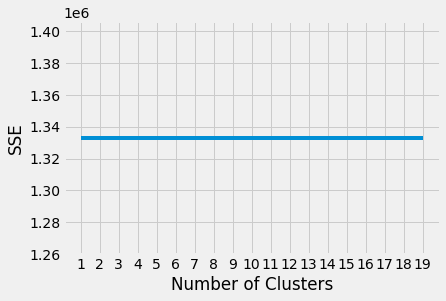

In [ ]:
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
plt.plot(range(1, 20), sse)
plt.xticks(range(1, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
#baseado no cálculo do coeficiente de silhueta
from sklearn.metrics import silhouette_score
silhouette_coefficients = []
for k in range(2, 11):
   kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
   kmeans.fit(df)
   score = silhouette_score(df, kmeans.labels_)
   silhouette_coefficients.append(score)

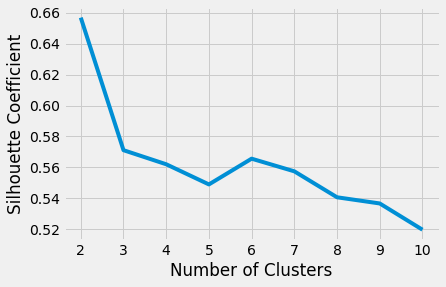

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

## DBScan

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df2 = scaler.fit_transform(df)


dbscan = DBSCAN(eps=2)
dbscan.fit(df2)
dbscan.labels_

array([ 0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0, -1,  0, -1,  0, -1, -1,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1,  0,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0, -1, -1, -1,
        0,  1, -1,  1,  1,  1,  1,  1, -1, -1, -1, -1,  0, -1, -1, -1,  0,
        0,  0,  0, -1,  0,  1,  0, -1, -1,  0, -1,  1,  0, -1,  0,  0, -1,
       -1,  0, -1, -1, -1, -1,  0,  0, -1,  0, -1, -1,  2,  2,  2, -1, -1,
       -1, -1, -1,  3,  3, -1,  3, -1, -1, -1, -1,  4,  4, -1, -1, -1, -1,
       -1, -1, -1,  4, -1, -1, -1,  4,  3,  3,  2,  4, -1, -1,  4, -1, -1,
        2,  4,  4, -1,  4, -1, -1, -1])

In [ ]:
#visualizar os clusters que cada tupla foi definida
X_clustered = dbscan.labels_
#criei uma copia do df para não alterar a predição
results = df[['Alcohol',	'Malic_Acid']].copy()
results['ClusterNumber'] = X_clustered
results

,Alcohol,Malic_Acid,ClusterNumber
0,14.23,1.71,0
1,13.20,1.78,0
2,13.16,2.36,0
3,14.37,1.95,0
4,13.24,2.59,-1
...,...,...,...
173,13.71,5.65,-1
174,13.40,3.91,4
175,13.27,4.28,-1
176,13.17,2.59,-1


In [ ]:
#visualizar a quantidade de clusters indicados
#se houver o valor -1 indica outliers
results['ClusterNumber'].value_counts()

-1    85
 0    66
 4     9
 1     8
 2     5
 3     5
Name: ClusterNumber, dtype: int64

In [ ]:
#sugestão de cálculo de clusters e ruídos
#https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py
labels = dbscan.labels_
n_clusters_ = len(np.unique(labels))
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 6
Estimated number of noise points: 85


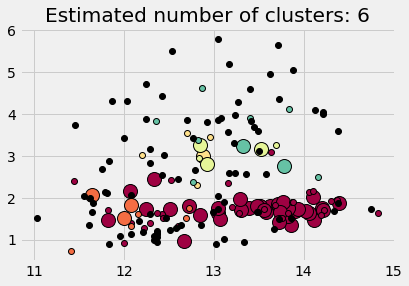

In [ ]:
#plotar gráfico com informações
import matplotlib.pyplot as plt
import numpy as np

core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
labels = dbscan.labels_
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = df[class_member_mask & core_samples_mask]
    plt.plot(
        xy.iloc[:, 0],
        xy.iloc[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = df[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy.iloc[:, 0],
        xy.iloc[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()


## Avaliação do DBScan

In [ ]:
#coeficiente de silhueta
dbscan_silhouette = silhouette_score(df, dbscan.labels_).round(2)
dbscan_silhouette

-0.27